In [1]:
import random as ran
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math

In [2]:
h=1
tmax=100
tpoints=np.arange(0,tmax+1,h)

sample=10000
s_points=np.arange(0,sample+1,h)

In [3]:
first=1
p_same=3/4
p_change=1/4

In [4]:
ele=first
pos=first
position=[]

In [5]:
up=2
down=-2
right=1
left=-1

In [6]:
# loop for capture possibility
for i in s_points:
    position.append(pos)
    ele = 1
    # 2nd move        
    if ran.random() > p_change:
        ele += right
        test = right
    else:
        if ran.random() > 1/2:
            ele += 0*up
            test = up
        else:
            ele += 0*down
            test = down
    # 3rd move  
    if test == right:
        if ran.random() > p_change:
            ele += right
            test = right
        else:
            if ran.random() > 1/2:
                ele += 0*up
                test = up
            else:
                ele += 0*down
                test = down
    else:
        if test == up:
            if ran.random() > p_change:
                ele += 0*up
                test = up
            else:
                if ran.random() > 1/2:
                    ele += left
                    test = left
                else:
                    ele += right
                    test = right
        else:
            if test == down:
                if ran.random() > p_change:
                    ele += 0*down
                    test = down
                else:
                    if ran.random() > 1/2:
                        ele += left
                        test = left
                    else:
                        ele += right
                        test = right
        # 4th and later move
        for t in range(3,tmax+1):
            if test == right:
                if ran.random() > p_change:
                    ele += right
                    test = right
                else:
                    if ran.random() > 1/2:
                        ele += 0*up
                        test = up
                    else:
                        ele += 0*down
                        test = down
            else:
                if test == up:
                    if ran.random() > p_change:
                        ele += 0*up
                        test = up
                    else:
                        if ran.random() > 1/2:
                            ele += left
                            test = left
                        else:
                            ele += right
                            test = right
                else:
                    if test == down:
                        if ran.random() > p_change:
                            ele += 0*down
                            test = down
                        else:
                            if ran.random() > 1/2:
                                ele += left
                                test = left
                            else:
                                ele += right
                                test = right
                    else:
                        if test == left:
                            if ran.random() > p_change:
                                ele += left
                                test = left
                            else:
                                if ran.random() > 1/2:
                                    ele += 0*up
                                    test = up
                                else:
                                    ele += 0*down
                                    test = down
    pos = ele


In [7]:
print(position)

[1, 13, 3, -10, 2, 3, 3, 3, 3, 3, 22, 3, 3, 3, 2, -20, 3, 2, 8, 3, 3, 2, -32, 3, 11, 32, 3, 21, 3, 3, 2, 2, 2, 2, 3, 3, 3, 15, 3, 2, 3, -5, 3, 21, 3, 2, 3, 3, -29, 2, -8, 3, 3, 19, 3, 2, 3, 3, 2, 3, -18, 3, 10, 3, 3, 10, 3, 2, 6, 2, 3, 3, 3, 29, 4, 2, -24, 3, -11, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, -10, 3, 3, 3, 3, 20, -17, 3, 3, 3, 8, 3, 2, 3, 3, -38, 3, 3, 3, 9, 3, 3, 2, 3, 3, 3, 17, 3, -15, 2, 3, 35, 3, 3, 3, 15, -5, 3, -21, 3, 3, 3, 3, 31, 3, 7, 3, 3, 3, 3, 3, 2, 3, 3, 2, -29, 2, -40, 3, 3, 3, 3, 2, 3, 2, 3, 3, 27, 3, 3, 2, 22, 3, 3, 3, 3, -16, 3, 3, 3, 3, 9, 2, 3, 3, -3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, -9, 7, 16, 2, -12, 3, 3, 3, 3, 2, 3, 2, -14, 2, 3, 3, 3, 3, 2, 5, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, -21, 3, 2, 3, 2, 2, -30, 3, 2, 2, 0, 3, 3, 3, 9, 3, 2, 5, 3, 3, 3, 3, 3, 3, 3, 2, -6, 5, 5, -4, 3, 3, 3, 3, 3, 3, 3, 3, 25, 3, 2, 3, -8, 8, 2, 3, 3, 3, 2, 3, 3, 3, 3, 11, 2, 2, 3, 3, 3, 19, 2, -29, 2, 2, 2, 3, 2, 3, 3, -9, 3, 3, 3, 3, 3, -19, 3, 3, 3, 7, 3, 3, 3, 3, -34, 3, 3, 3, 19, 3,

In [8]:
position=position[1:sample+1]
print(len(position))

10000


In [9]:
reactor=[]
capture=[]
through=[]

num_r=0
num_c=0
num_t=0

size=np.arange(1,tmax+1,h)

In [13]:
for j in range(tmax):
    reactor.append(num_r)
    capture.append(num_c)
    through.append(num_t)
    x = size[j]
    nt=0
    nc=0
    nr=0
    for i in range(sample):
        if position[i] > x:
            nt += 1
        elif position[i] > 0:
            nc += 1
        else:
            nr += 1
    num_r = nr
    num_c = nc
    if nt == 0:
        num_t = 0.001
    else:
        num_t = nt

In [14]:
reactor_n=reactor[1:tmax+1]
capture_n=capture[1:tmax+1]
through_n=through[1:tmax+1]

In [15]:
print(reactor_n)
print(len(reactor_n))

[1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224, 1224]
100


In [16]:
print(capture_n)
print(len(capture_n))

[53, 1912, 7643, 7698, 7754, 7806, 7858, 7904, 7968, 7992, 8043, 8094, 8135, 8182, 8234, 8273, 8318, 8355, 8389, 8419, 8449, 8474, 8491, 8519, 8547, 8570, 8595, 8616, 8632, 8642, 8663, 8680, 8690, 8709, 8721, 8727, 8731, 8739, 8743, 8750, 8756, 8760, 8762, 8766, 8770, 8771, 8772, 8772, 8772, 8774, 8774, 8775, 8775, 8775, 8775, 8775, 8775, 8775, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776, 8776]
100


In [17]:
print(through_n)
print(len(through_n))

[8723, 6864, 1133, 1078, 1022, 970, 918, 872, 808, 784, 733, 682, 641, 594, 542, 503, 458, 421, 387, 357, 327, 302, 285, 257, 229, 206, 181, 160, 144, 134, 113, 96, 86, 67, 55, 49, 45, 37, 33, 26, 20, 16, 14, 10, 6, 5, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
100


In [18]:
print(size)
print(len(size))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
100


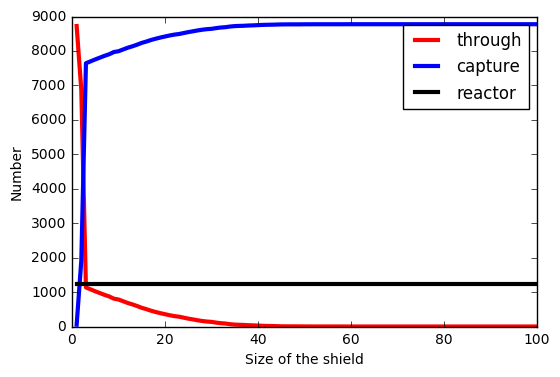

In [19]:
size_array=np.array(size)
through_array=np.array(through_n)
capture_array=np.array(capture_n)
reactor_array=np.array(reactor_n)
plt.plot(size_array,through_array,'-',label='through',color='red',linewidth=3.0)
plt.plot(size_array,capture_array,'-',label='capture',color='blue',linewidth=3.0)
plt.plot(size_array,reactor_array,'-',label='reactor',color='black',linewidth=3.0)
plt.legend()
plt.xlabel('Size of the shield')
plt.ylabel('Number')
plt.show()





In [20]:
P_through=through_array/sample
P_capture=capture_array/sample
P_reactor=reactor_array/sample

In [21]:
m_through,b_through=np.polyfit(size,np.log(P_through),1)
print(m_through,b_through)


fit_t=m_through*size+b_through
uncertainty_t=(1/tmax)*np.sum((fit_t-np.log(P_through))**2)#Standard Deviation
print(math.sqrt(uncertainty_t))

-0.191707640201 0.0542277551181
1.8520635154131948


In [22]:
m_capture,b_capture=np.polyfit(size,np.log(P_capture),1)
print(m_capture,b_capture)


fit_c=m_capture*size+b_capture
uncertainty_c=(1/tmax)*np.sum((fit_t-np.log(P_capture))**2)#Standard Deviation
print(math.sqrt(uncertainty_c))

0.00477125834631 -0.456636559128
10.999969360367253


In [23]:
m_reactor,b_reactor=np.polyfit(size,np.log(P_reactor),1)
print(m_reactor,b_reactor)


fit_t=m_reactor*size+b_reactor
uncertainty_r=(1/tmax)*np.sum((fit_t-np.log(P_reactor))**2)#Standard Deviation
print(math.sqrt(uncertainty_r))

9.16153777803e-18 -2.1004609089
3.202372833989377e-16
